In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [21]:
data=pd.read_csv("C:\\Users\\mkepa\\Downloads\\netflix.csv")

In [4]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4881 non-null   object 
 1   High       4881 non-null   float64
 2   Low        4881 non-null   float64
 3   Open       4881 non-null   float64
 4   Close      4881 non-null   float64
 5   Volume     4881 non-null   float64
 6   Adj Close  4881 non-null   float64
dtypes: float64(6), object(1)
memory usage: 267.1+ KB


In [24]:
data_num=data.select_dtypes(include='float64').columns

In [25]:
data_num=list(data_num)

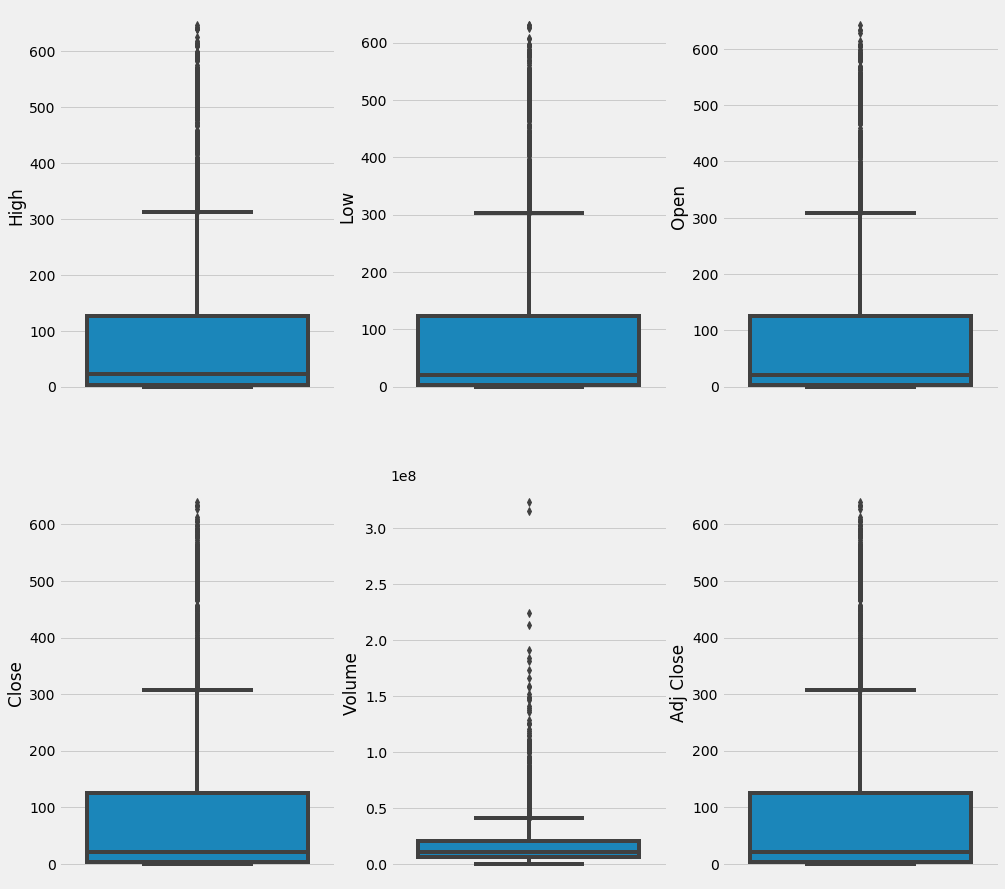

In [26]:
fig=plt.figure(figsize=(15,15))
for i,var in enumerate(data_num):
    ax=plt.subplot(2,3,i+1)
    sns.boxplot(y=var, data=data,ax=ax)
    

In [22]:
def removing_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    low=Q1-(1.5*IQR)
    high=Q3+(1.5*IQR)
    return low,high

In [25]:
low,high=removing_outlier(data['Close'])

In [34]:
data[data['Close']>high]['Close'].count()

770

In [27]:
data=data.set_index(pd.DatetimeIndex(data['Date'].values))

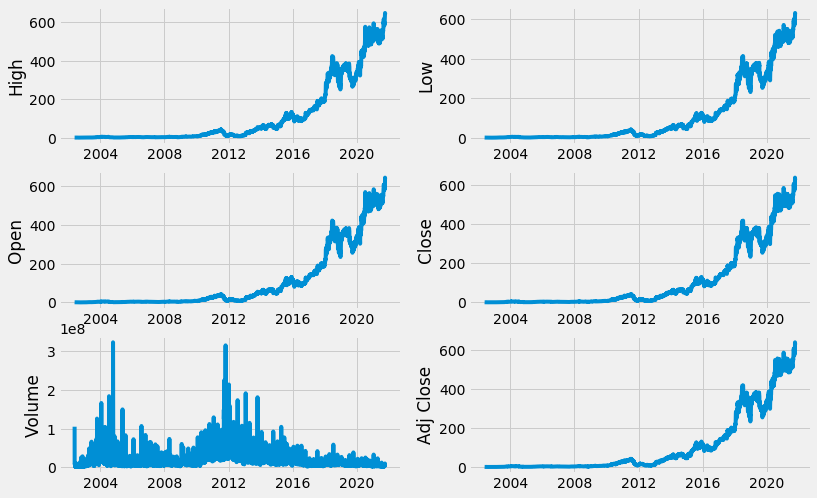

In [28]:
fig=plt.figure(figsize=(12,8))
for i,var in enumerate(data_num):
    ax=plt.subplot(3,2,i+1)
    sns.lineplot(data.index,y=var,data=data,ax=ax)

In [29]:
data['Date']=pd.to_datetime(data['Date'])

In [30]:
data['Year']=data['Date'].dt.year

In [31]:
data['Quarter']=data['Date'].dt.quarter

In [52]:
df=data[data['Year']>=2003]

In [45]:
df=df[['Close','Year','Quarter']].groupby(by=['Year','Quarter']).mean().values

In [34]:
df=pd.DataFrame(data=df.reshape(19,4),index=list(range(2003,2022)),columns=['Q1','Q2','Q3','Q4'])

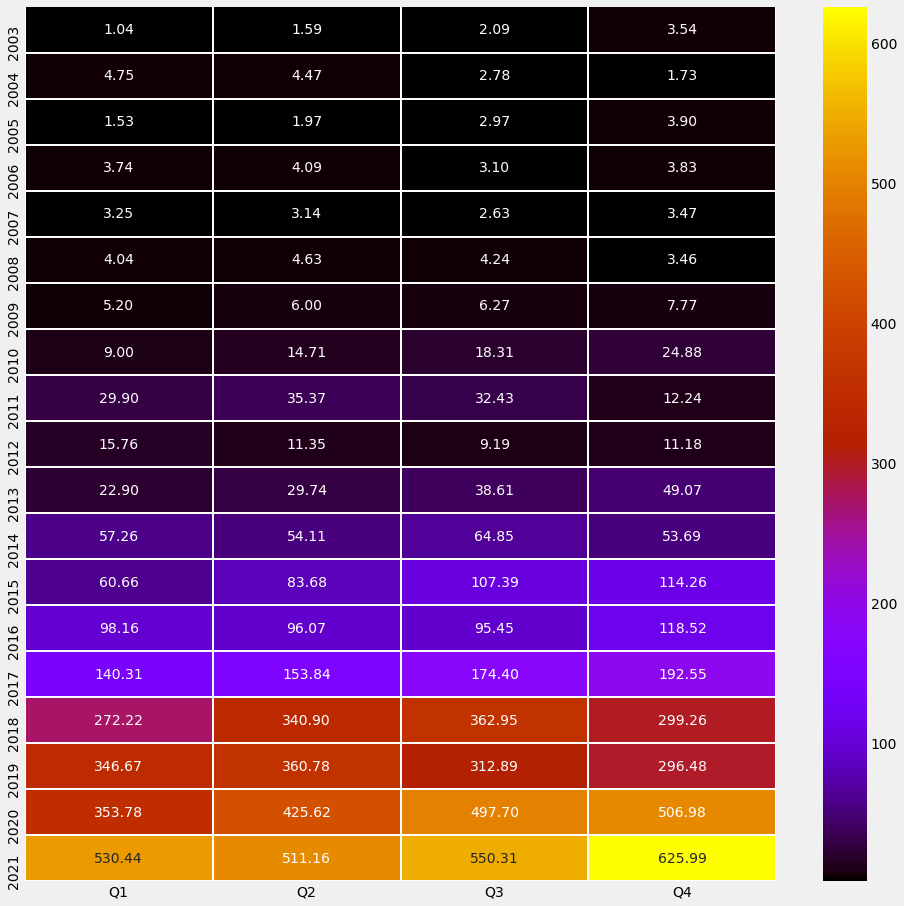

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(df,annot=True,fmt='.2f',cmap='gnuplot',linewidths=1)

In [6]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
2002-05-23,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
2002-05-24,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2002-05-28,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
2002-05-29,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
2002-05-30,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


In [55]:
delta=data['Adj Close'].diff(1)

In [56]:
delta

2002-05-23          NaN
2002-05-24     0.013571
2002-05-28    -0.052857
2002-05-29    -0.053572
2002-05-30    -0.032142
                ...    
2021-10-05    31.460022
2021-10-06     4.289978
2021-10-07    -7.250000
2021-10-08     0.809998
2021-10-11    -5.619995
Name: Adj Close, Length: 4881, dtype: float64

In [57]:
delta=delta.dropna()

In [58]:
up=delta.copy()
down=delta.copy()

In [59]:
up[up<0]=0

In [60]:
down[down>0]=0

In [61]:
down

2002-05-24    0.000000
2002-05-28   -0.052857
2002-05-29   -0.053572
2002-05-30   -0.032142
2002-05-31    0.000000
                ...   
2021-10-05    0.000000
2021-10-06    0.000000
2021-10-07   -7.250000
2021-10-08    0.000000
2021-10-11   -5.619995
Name: Adj Close, Length: 4880, dtype: float64

In [62]:
AVG_Gain=up.rolling(window=14).mean()

In [63]:
AVG_Loss=abs(down.rolling(window=14).mean())

In [64]:
RS=AVG_Gain/AVG_Loss

In [65]:
RSI=100-(100/(1.0+RS))

In [66]:
RSI

2002-05-24          NaN
2002-05-28          NaN
2002-05-29          NaN
2002-05-30          NaN
2002-05-31          NaN
                ...    
2021-10-05    71.065852
2021-10-06    71.219924
2021-10-07    66.557570
2021-10-08    74.832912
2021-10-11    72.731068
Name: Adj Close, Length: 4880, dtype: float64

In [67]:
RSI.tail()

2021-10-05    71.065852
2021-10-06    71.219924
2021-10-07    66.557570
2021-10-08    74.832912
2021-10-11    72.731068
Name: Adj Close, dtype: float64

In [68]:
RSI=pd.DataFrame(data=RSI,index=RSI.index,columns=['Adj Close'])

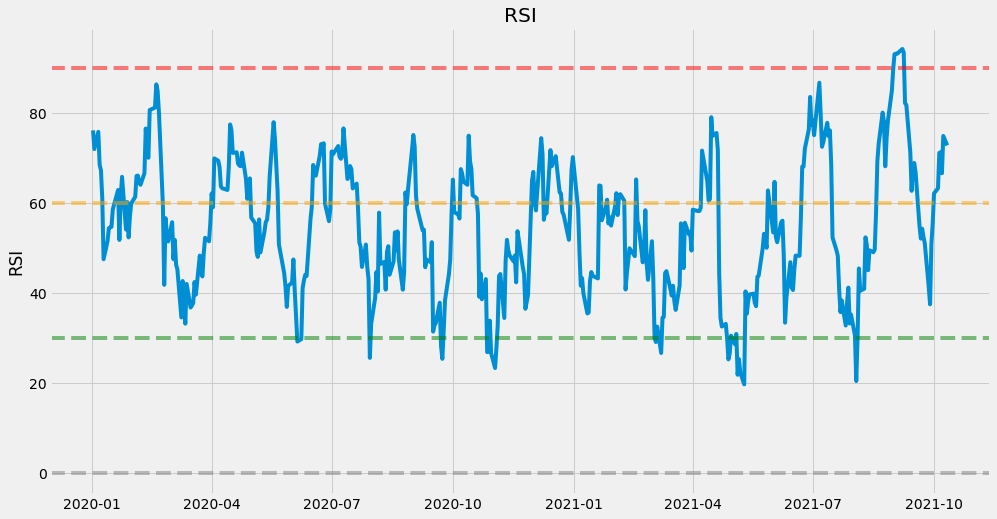

In [74]:
fig=plt.figure(figsize=(15,8))
sns.lineplot(RSI.loc['2020-01-01':'2021-12-30'].index,y='Adj Close',data=RSI.loc['2020-01-01':'2021-12-30'])
plt.ylabel('RSI')
plt.title('RSI')
plt.axhline(0,linestyle='--',alpha=0.5,color='gray')
plt.axhline(30,linestyle='--',alpha=0.5,color='green')
plt.axhline(60,linestyle='--',alpha=0.5,color='orange')
plt.axhline(90,linestyle='--',alpha=0.5,color='red')

Text(0.5, 1.0, 'Netflix Price')

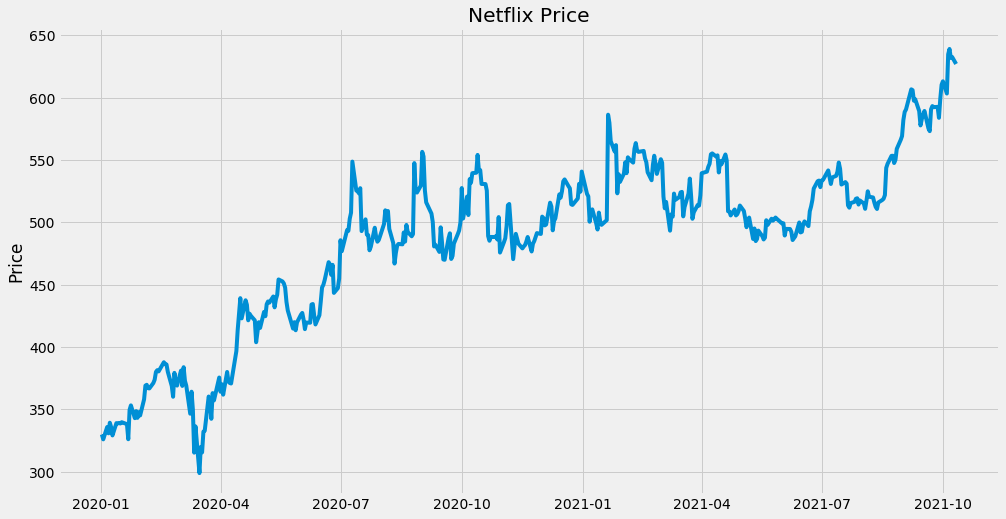

In [75]:
fig=plt.figure(figsize=(15,8))
sns.lineplot(data.loc['2020-01-01':'2021-12-30'].index,y='Adj Close',data=data.loc['2020-01-01':'2021-12-30'])
plt.ylabel('Price')
plt.title('Netflix Price')

In [ ]:
### Calculating MACD (Moving average Convergance/Divergence)

In [79]:
ShortEMA=data['Close'].ewm(span=12, adjust=False).mean()

In [81]:
LongEMA=data['Close'].ewm(span=26, adjust=False).mean()

In [76]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Quarter
2002-05-23,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429,2002,2
2002-05-24,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000,2002,2
2002-05-28,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143,2002,2
2002-05-29,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571,2002,2
2002-05-30,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429,2002,2


In [83]:
MACD=ShortEMA-LongEMA

In [84]:
signal=MACD.ewm(span=9, adjust=False).mean()

Text(0, 0.5, '')

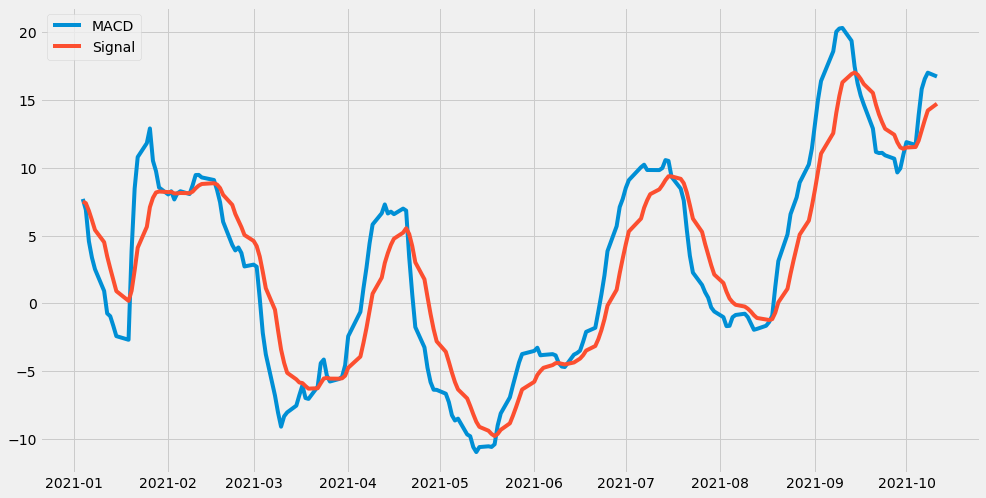

In [109]:
fig=plt.figure(figsize=(15,8))
sns.lineplot(data.loc['2021-01-01':'2021-12-30'].index,MACD.loc['2021-01-01':'2021-12-30'],data=data.loc['2021-01-01':'2021-12-30'],label='MACD')
sns.lineplot(data.loc['2021-01-01':'2021-12-30'].index,signal.loc['2021-01-01':'2021-12-30'],data=data.loc['2021-01-01':'2021-12-30'],label='Signal')
plt.legend(loc='upper left')
plt.ylabel('')

In [86]:
MACD

2002-05-23     0.000000
2002-05-24     0.001083
2002-05-28    -0.002298
2002-05-29    -0.009194
2002-05-30    -0.017056
                ...    
2021-10-05    13.897996
2021-10-06    15.814954
2021-10-07    16.558270
2021-10-08    17.016557
2021-10-11    16.733374
Name: Close, Length: 4881, dtype: float64